In [126]:
import random
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy import stats


In [2]:
# read subject numbers and define template for subject data path
data_path_fmt = '/Volumes/homes/Asaf/processed_data/%d/MNINonLinear/Results/rsfMRI_AP/rsfMRI_AP_Atlas_hp2000_clean.dtseries.nii'
subjects_numbers = open('/Volumes/home/processed_data/all_subjects.txt', 'r').read()
subjects_numbers = subjects_numbers.replace(' ', '').splitlines()
subjects_numbers = sorted([int(sub) for sub in subjects_numbers])

In [3]:
mask_path = '/Volumes/home/atlases/LH_Default_pCunPCC_1_mask.dtseries.nii'
mask_img = nib.load(mask_path)
mask = mask_img.get_fdata()
mask_ind = np.where(mask[0]==1)[0]

In [4]:
subjects_data_path = [data_path_fmt % sub_num for sub_num in subjects_numbers]

### step 1: create seed2voxel maps

In [6]:
N = len(subjects_numbers)
num_voxels = mask.shape[1] #91282

all_seed2voxel = np.empty([num_voxels, N])

for i, sub_path in enumerate(subjects_data_path):
    # load subject resting state data
    subject_rs = nib.load(sub_path)
    subject_rs = subject_rs.get_fdata()
    # Average the relevant vertices according to the mask (idx)
    roi_ts = subject_rs[:, mask_ind].mean(axis=1)
    for voxel in range(num_voxels):
        all_seed2voxel[(voxel,i)] = pearsonr(subject_rs[:, voxel], roi_ts)[0]
    print(f"Subject {i+1}/{N}")

Subject 1/40
Subject 2/40
Subject 3/40
Subject 4/40
Subject 5/40
Subject 6/40
Subject 7/40
Subject 8/40
Subject 9/40
Subject 10/40
Subject 11/40
Subject 12/40
Subject 13/40
Subject 14/40
Subject 15/40
Subject 16/40
Subject 17/40
Subject 18/40
Subject 19/40
Subject 20/40
Subject 21/40
Subject 22/40
Subject 23/40
Subject 24/40
Subject 25/40
Subject 26/40
Subject 27/40
Subject 28/40
Subject 29/40
Subject 30/40
Subject 31/40
Subject 32/40
Subject 33/40
Subject 34/40
Subject 35/40
Subject 36/40
Subject 37/40
Subject 38/40
Subject 39/40
Subject 40/40


In [7]:
all_seed2voxel.shape

(91282, 40)

In [8]:
all_seed2voxel = pd.DataFrame(data=all_seed2voxel, columns=subjects_numbers)

all_seed2voxel = all_seed2voxel.T

In [9]:
all_seed2voxel

,0,1,2,3,4,5,6,7,8,9,...,91272,91273,91274,91275,91276,91277,91278,91279,91280,91281
102,0.200577,0.038076,0.053925,0.131523,-0.002448,-0.064537,0.043893,0.058450,0.044256,0.114070,...,0.049853,0.079272,0.087483,0.022523,0.102759,0.117290,0.044760,0.107837,0.091116,0.065222
105,0.211719,0.097317,0.002951,0.105682,-0.021424,-0.036738,0.060090,0.088028,0.140250,-0.043769,...,-0.085132,0.031588,0.111820,0.087939,0.032057,0.122286,0.114272,0.054038,-0.001276,-0.034855
107,0.203619,0.096690,0.241700,-0.073480,0.031502,0.169377,0.005359,0.074149,0.083007,-0.005700,...,-0.037532,-0.061504,-0.027327,0.007092,-0.039716,-0.023854,0.063783,0.054521,0.060774,0.008158
108,0.174543,0.023810,-0.034396,0.002127,-0.121842,0.113403,-0.119636,-0.015053,0.024187,0.050861,...,0.058810,0.076711,0.074156,0.025153,0.044962,0.035524,-0.002199,-0.000758,0.038736,0.052339
109,0.162517,0.294257,0.152147,-0.087161,0.215259,0.248097,-0.055595,-0.032408,-0.106913,0.029870,...,-0.031253,-0.024496,0.017936,0.107682,0.076301,0.091103,0.136611,0.025429,-0.061571,-0.001528
110,0.075431,0.025428,0.011828,0.112221,-0.018425,0.081947,0.095433,0.097636,0.098265,-0.089402,...,-0.079946,0.008891,0.082988,0.090877,-0.049924,-0.003131,0.012445,-0.087580,-0.126149,-0.128363
111,0.196942,-0.091302,-0.071919,0.073980,-0.106783,0.181878,0.182040,0.154915,0.080214,-0.050085,...,-0.148545,-0.088821,-0.051125,-0.040922,-0.048181,-0.042284,-0.055539,-0.092012,-0.111068,-0.087889
112,0.162878,-0.080858,-0.006722,-0.088197,0.252476,0.188549,0.025344,0.058046,0.039954,0.012145,...,0.185955,0.126030,0.098625,0.112485,0.089246,0.115750,0.164703,0.064851,0.045062,0.024471
113,0.071840,-0.034226,0.072627,0.044257,0.257898,0.035879,0.123243,0.048829,0.080259,0.031199,...,0.015329,0.004660,0.005995,0.041522,0.020418,-0.021078,0.007316,-0.043611,-0.037622,0.055581
114,0.056075,0.033140,-0.027487,-0.062151,0.034912,0.038616,0.135455,0.010969,0.089635,-0.066590,...,0.027041,-0.031811,-0.070770,-0.044505,0.046737,-0.013879,-0.022891,0.054879,0.069102,0.027175


In [10]:
#save df
all_seed2voxel.to_csv('../data/seed2voxel_LH_Default_pCunPCC_1.csv')

## Step 2

In [5]:
def correlation_permuation_test(seed2voxel_map, behavior_vector):
    permutations = 5000
    seed2voxel2behavior = seed2voxel_map.corrwith(behavior_vector, axis=0, method='pearson')
    behavior_permuted = behavior_vector.copy()
    sum_of_higher = np.zeros(seed2voxel2behavior.shape)

    for i in range(permutations):
        # for each permuation shuffle the predicted values between subjects, and calculate correlation with the true values 
        random.shuffle(behavior_permuted.values)
        seed2voxel2behavior_permute = seed2voxel_map.corrwith(behavior_permuted, axis=0, method='pearson')
        higher_than_original = np.abs(seed2voxel2behavior_permute) > np.abs(seed2voxel2behavior)
        sum_of_higher += higher_than_original
        
    pval = sum_of_higher / permutations
    return pval

In [6]:
seed2voxel_map = pd.read_csv('../data/seed2voxel_LH_SomMot_6.csv')

In [7]:
seed2voxel_map = seed2voxel_map.rename({'Unnamed: 0' : 'Subject'}, axis=1)
seed2voxel_map = seed2voxel_map.set_index('Subject')

In [8]:
behavioral_df = pd.read_csv('../data/aggregate_indices_subs101_148_08Dec2020.csv', index_col='Subject')

In [9]:
behavior_vector = behavioral_df.loc[seed2voxel_map.index]['AFRIAT Index']
inconsistent_subjects = behavior_vector!=0

In [10]:
behavior_vector = behavior_vector.loc[inconsistent_subjects]
seed2voxel_map = seed2voxel_map.loc[inconsistent_subjects, :]

In [11]:
seed2voxel2behavior = seed2voxel_map.corrwith(behavior_vector, axis=0, method='pearson')

In [12]:
p = correlation_permuation_test(seed2voxel_map, behavior_vector)

KeyboardInterrupt: 

In [76]:
p.to_csv('../data/SomMot6_seed2voxel2behavior_p_val.csv')

## Step 3: analyze voxels p-values

In [13]:
from scipy.stats import norm

In [14]:
pval_map = pd.read_csv('../data/pCunPCC1_seed2voxel2behavior_p_val.csv')
pval_map = pval_map.drop(labels='Unnamed: 0', axis=1)

In [15]:
def save_map_to_nii(pval_map, seed2voxel2behavior, example_nii, save_path):
    z_map = np.multiply(norm.ppf(1-pval_map.values.flatten()), np.sign(seed2voxel2behavior.values.flatten()))
    tmp_img = nib.load(example_nii)
    new_data = tmp_img.get_fdata().copy()
    header = tmp_img.header
    new_data[0, :] = z_map
    new_image = nib.Cifti2Image(new_data, header=header)
    nib.save(new_image, save_path)

In [16]:
z_map = np.multiply(norm.ppf(1-pval_map.values.flatten()), np.sign(seed2voxel2behavior.values.flatten()))
# remove infinite (pval=1 --> z=inf)
z_map[np.where(z_map==np.inf)] = 10
z_map[np.where(z_map==-np.inf)] = -10

tmp_img = nib.load(mask_path)
new_data = tmp_img.get_fdata().copy()
header = tmp_img.header
new_data[0, :] = z_map

In [25]:
np.unique(new_image.get_fdata()[0])

array([-10.        ,  -3.5400838 ,  -3.35279478, ...,   3.35279478,
         3.5400838 ,  10.        ])

In [18]:
new_image = nib.Cifti2Image(new_data, header=header)

In [239]:
nib.save(new_image, '../data/pCunPCC1_seed2voxel_zmap.dtseries.nii')

In [19]:
import os

In [156]:
threshold_val = '1.96'
surface_size = '100'
volume_size = '400'
input = '../data/SomMot6_seed2voxel_zmap.dtseries.nii'
output = '../data/SomMot6_seed2voxel_zmap_clustered.dtseries.nii'
surfaces = '-left-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii -right-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii'
command = 'wb_command -cifti-find-clusters ' + input + ' ' + threshold_val + ' ' + surface_size + ' ' + threshold_val + ' ' + volume_size + ' COLUMN ' + output + ' ' + surfaces
os.system(command)

0

In [154]:
threshold_val = '1.96'
surface_size = '50'
volume_size = '400'
input = '../data/pCunPCC1_seed2voxel_zmap.dtseries.nii'
output = '../data/pCunPCC1_seed2voxel_zmap_clustered.dtseries.nii'
surfaces = '-left-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii -right-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii'
command = 'wb_command -cifti-find-clusters ' + input + ' ' + threshold_val + ' ' + surface_size + ' ' + threshold_val + ' ' + volume_size + ' COLUMN ' + output + ' ' + surfaces
os.system(command)

0

In [151]:
a = nib.load(output)
np.unique(a.get_fdata()[0])
from collections import Counter
Counter(a.get_fdata()[0]).most_common()

[(0.0, 82659),
 (35.0, 1196),
 (1.0, 400),
 (76.0, 389),
 (36.0, 301),
 (6.0, 291),
 (82.0, 291),
 (38.0, 266),
 (75.0, 247),
 (14.0, 246),
 (4.0, 235),
 (41.0, 212),
 (48.0, 174),
 (88.0, 165),
 (86.0, 142),
 (15.0, 121),
 (25.0, 119),
 (70.0, 110),
 (80.0, 108),
 (54.0, 106),
 (71.0, 106),
 (5.0, 105),
 (72.0, 101),
 (12.0, 95),
 (84.0, 92),
 (45.0, 86),
 (87.0, 82),
 (2.0, 81),
 (58.0, 81),
 (77.0, 81),
 (57.0, 80),
 (83.0, 79),
 (3.0, 78),
 (81.0, 78),
 (43.0, 75),
 (89.0, 69),
 (40.0, 68),
 (85.0, 68),
 (27.0, 64),
 (13.0, 63),
 (59.0, 63),
 (69.0, 63),
 (74.0, 63),
 (8.0, 62),
 (42.0, 62),
 (22.0, 58),
 (21.0, 57),
 (34.0, 57),
 (49.0, 55),
 (79.0, 55),
 (44.0, 54),
 (73.0, 54),
 (17.0, 52),
 (78.0, 51),
 (62.0, 45),
 (24.0, 43),
 (47.0, 43),
 (16.0, 36),
 (23.0, 36),
 (10.0, 35),
 (19.0, 35),
 (68.0, 35),
 (9.0, 33),
 (50.0, 33),
 (52.0, 33),
 (61.0, 33),
 (60.0, 32),
 (18.0, 31),
 (28.0, 31),
 (56.0, 31),
 (65.0, 31),
 (46.0, 30),
 (55.0, 30),
 (63.0, 30),
 (7.0, 29),
 (67.0, 2

In [23]:
input = '../data/pCunPCC1_seed2voxel_zmap.dtseries.nii'
output = '../data/pCunPCC1_seed2voxel_zmap_clustered.dtseries.nii'
surfaces = '-left-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii -right-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii'
command = 'wb_command -surface-vertex-areas ' + mask_path + ' mm'
os.system(command)


While running:
/Users/elaine/Downloads/workbench-mac64-v1.5.0/workbench/bin_macosx64/../macosx64_apps/wb_command.app/Contents/MacOS/wb_command -surface-vertex-areas /Volumes/home/atlases/LH_Default_pCunPCC_1_mask.dtseries.nii mm

ERROR: NAME OF FILE: LH_Default_pCunPCC_1_mask.dtseries.nii
PATH TO FILE: /Volumes/home/atlases

File is not a valid GIFTI file: error occurred while parsing element
line number: 1 column number: 1



65280

In [35]:
pval_map

,0
0,0.3904
1,0.0144
2,0.8658
3,0.2598
4,0.8848
...,...
91277,0.0312
91278,0.0032
91279,0.3438
91280,0.1872


In [54]:
seed2voxel2behavior = seed2voxel2behavior.reset_index(drop=True)

In [144]:
# permute p-values to find the cluster size for significance
surface_size = '100'
temp_input = '../data/tmp_permuted_pvals.dtseries.nii'
temp_output = '../data/tmp_permuted_pvals_clustered.dtseries.nii'
surfaces = '-left-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.L.midthickness.32k_fs_LR.surf.gii -right-surface /Volumes/HCP/HCP_WB_Tutorial_1.0/Q1-Q6_R440.R.midthickness.32k_fs_LR.surf.gii'
command = 'wb_command -cifti-find-clusters ' + temp_input + ' ' + threshold_val + ' ' + surface_size + ' ' + threshold_val + ' ' + volume_size + ' COLUMN ' + temp_output + ' ' + surfaces
pval_map_permuted = pval_map.copy()
indices = np.arange(len(pval_map_permuted))
permuted_indices = indices.copy()
permutations = 1000
max_clusters = []
min_clusters = []
counters = []
for i in range(permutations):
    random.shuffle(permuted_indices)
    save_map_to_nii(pval_map_permuted.loc[permuted_indices], seed2voxel2behavior.loc[permuted_indices], mask_path, input_path)
    os.system(command)
    output_nii = nib.load(output_path)
    output_data = output_nii.get_fdata()[0]
    counter_data = list(Counter(output_data).values())
    counters.append(counter_data)
    if len(counter_data) == 1:
        continue
    else:
        max_clusters.append(max(counter_data[1:]))
        min_clusters.append(min(counter_data[1:]))

In [147]:
max_clusters

[58]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([57.5, 57.6, 57.7, 57.8, 57.9, 58. , 58.1, 58.2, 58.3, 58.4, 58.5]),
 <BarContainer object of 10 artists>)

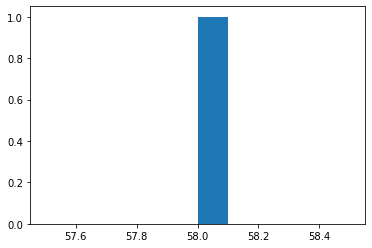

In [145]:
plt.hist(max_clusters)

58

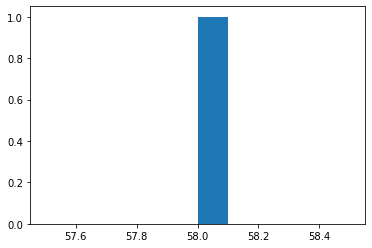

In [146]:
plt.hist(min_clusters)
min(min_clusters)

In [ ]:
stats.scoreatpercentile(max_clusters, 95)

22.0

In [137]:
(50/min(min_clusters))*22

100.00000000000001